In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

!pip install tensorflow_addons
import tensorflow_addons as tfa

import os
import random

from google.colab import drive
from tensorflow import keras
from keras import models, layers, metrics
from keras.utils import metrics_utils, custom_object_scope
from keras.metrics import Accuracy, Precision, Recall, SparseCategoricalAccuracy
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix
from keras import backend as K

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 7.5 MB/s eta 0:00:00


/usr/local/lib/python3.9/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.9.0 and strictly below 2.12.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.12.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(


In [ ]:
#mount google drive so we can import dataset
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
day_list = [9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]
imgarray = [] #training images
label_array = [] #training labels

In [ ]:
#import dataset, create paths, and convert/store images to arrays
for i in day_list:
  imgday = '/content/drive/Shareddrives/Soybean hydroponics/IMAGE ANALYSIS/annotated_images/Day ' + str(i)
  #imgday: string of path with image's day name
  #first part of that is the path in my drive to the dataset desired. The annotated images are sorted/stored into the days in day_list

  #there are a maximum of 33 images/soybean plants for each day. The following for loop accounts for this and creates paths for every image in the dataset. 
  #there are a couple days toward the end of the growth cycle that are not included in our dataset, AND the number of images per day varies. 
  #So we verify a path exists in the Drive before trying to use it
  for j in range(35):
    fullimgname = imgday + '/Day ' + str(i) + '-' + str(j) + '.jpg'
    #fullimgname: string of image's full day name
    ExistOrNot = os.path.exists(fullimgname)
    if ExistOrNot:
      #print("fullimgname: ", fullimgname)
      #load image
      #convert image into array, and add this to the overall giant array that stores all of the images in their array format.
      imgarray.append(tf.keras.preprocessing.image.img_to_array(tf.keras.utils.load_img(fullimgname, target_size=(256, 256))))

      label_array.append(i)

In [ ]:
len(imgarray)

328

In [ ]:
print(label_array)

[9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20

In [ ]:
########day_list = [9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]

for i in range(len(label_array)):

  if 9 <= label_array[i] <= 11:
    label_array[i] = 0
  elif 12 <= label_array[i] <= 14:
    label_array[i] = 1
  elif 15 <= label_array[i] <= 17:
    label_array[i] = 2
  elif 18 <= label_array[i] <= 20:
    label_array[i] = 3
  elif 22 <= label_array[i] <= 28:
    label_array[i] = 4

In [ ]:
print(label_array)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]


Creating & Formatting our dataset, separating for training and testing

In [ ]:
#MAYBE LATER: separate images into training and testing data -> recommended 80% training, 20% testing/validation -> have 330 images total
#going to set aside one image per class for demo/testing use outside of this code, such as for inputting to the web app to receive predictions there.
#that leaves 248 images for training, 62 for testing within the code, and 20 for testing & demo otherwise


In [ ]:
#reshape arrays to input_shape size

In [ ]:
#creating data augmentation layers

data_rotation = keras.Sequential([
    layers.RandomRotation(0.2)
])
data_flipping = keras.Sequential([
    layers.RandomFlip('horizontal_and_vertical')
])
data_contrast = keras.Sequential([
    layers.RandomContrast(0.3)
])

In [ ]:
img_train, img_test, label_train, label_test = train_test_split(imgarray, label_array, test_size = 0.2, shuffle = True)
img_train, img_validate, label_train, label_validate = train_test_split(imgarray, label_array, test_size = 0.25, shuffle = True)

In [ ]:
#build linear model 
model = keras.Sequential()

#CNN input takes tensors in shape (image_height, image_width, color_channels)
model.add(keras.Input(shape=(256,256,3)))

#add in data augmentation layer
model.add(data_rotation)
model.add(data_flipping)
model.add(data_contrast)


#add convolution and pooling layers to model -> this part is for the feature extraction of images
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Conv2D(32, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=2))

#Flatten the last layer of pooling, so we can do a couple of fully connected layers
model.add(layers.Flatten())
model.add(layers.Dense(128, activation = 'relu'))
#Dense(x, activation = 'softmax') -> x = nodes on the last layer, and this is the number of classes you have for your dataset. We have 20!
model.add(layers.Dense(5, activation = 'softmax'))


Defining custom Precision metric

In [ ]:
def precision(label_true, label_pred):
      label_true = K.ones_like(label_true)
      true_positives = K.sum(K.round(K.clip(label_true * label_pred, 0, 1)))

      predicted_positives = K.sum(K.round(K.clip(label_pred, 0, 1)))
      precision = true_positives / (predicted_positives + K.epsilon())
      return precision

In [ ]:
def recall(label_true, label_pred):
  label_true = K.ones_like(label_true)
  true_positives = K.sum(K.round(K.clip(label_true*label_pred, 0, 1)))
  all_positives = K.sum(K.round(K.clip(label_true, 0, 1)))

  recall = true_positives / (all_positives + K.epsilon())
  return recall

In [ ]:
#defining f1 score metric
class f1_score(keras.metrics.Metric):
    def __init__(self, name='f1_score', **kwargs):
        super(f1_score, self).__init__(name=name, **kwargs)
        self.f1 = self.add_weight(name='f1', initializer='zeros')
        self.precision = Precision()
        self.recall = Recall()

    def update_state(self, label_true, label_pred, sample_weight=None):
        precisionf = self.precision(label_true, label_pred)
        recallf = self.recall(label_true, label_pred)
        self.f1.assign(2 * ((precisionf * recallf) / (precisionf + recallf + K.epsilon())))

    def result(self):
        return self.f1
    
    def reset_states(self):
        self.f1.assign(0.)
        self.precision.reset_states()
        self.recall.reset_states()

    def get_config(self):
        return {"f1": self.f1}
    
    @classmethod
    def from_config(cls, config):
        return cls(**config)


In [ ]:
#compile model with settings
###### decide on optimizer
###### losses: could I use softmax crossentropy with logits? 
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = [SparseCategoricalAccuracy(), precision, recall])

In [ ]:
### Recall(), tfa.metrics.F1Score(num_classes=3)               additional metrics

In [ ]:
#View all the layers of our model
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 sequential_2 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 254, 254, 128)     3584      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 128)    0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      73792     
                                                      

In [ ]:
#convert training arrays into numpy arrays
img_test = np.asarray(img_test)
img_train = np.asarray(img_train)
img_validate = np.asarray(img_validate)
label_train = np.asarray(label_train)
label_test = np.asarray(label_test)
label_validate = np.asarray(label_validate)

In [ ]:
#Train the model -> gonna start with 10 epochs, but may increase this
history = model.fit(img_train, label_train, epochs = 15, validation_data = (img_validate, label_validate))

Epoch 1/15
8/8 [==============================] - 105s 13s/step - loss: 1.0708 - sparse_categorical_accuracy: 0.5650 - precision: 1.0000 - recall: 0.6239 - val_loss: 1.3275 - val_sparse_categorical_accuracy: 0.4878 - val_precision: 1.0000 - val_recall: 0.6019
Epoch 2/15
8/8 [==============================] - 94s 12s/step - loss: 1.1744 - sparse_categorical_accuracy: 0.4959 - precision: 1.0000 - recall: 0.4989 - val_loss: 1.1401 - val_sparse_categorical_accuracy: 0.5000 - val_precision: 1.0000 - val_recall: 0.5556
Epoch 3/15
8/8 [==============================] - 92s 11s/step - loss: 1.0472 - sparse_categorical_accuracy: 0.5732 - precision: 1.0000 - recall: 0.4020 - val_loss: 1.1933 - val_sparse_categorical_accuracy: 0.4878 - val_precision: 1.0000 - val_recall: 0.5914
Epoch 4/15
8/8 [==============================] - 94s 12s/step - loss: 0.9540 - sparse_categorical_accuracy: 0.6301 - precision: 1.0000 - recall: 0.6609 - val_loss: 1.2933 - val_sparse_categorical_accuracy: 0.4634 - val_pr

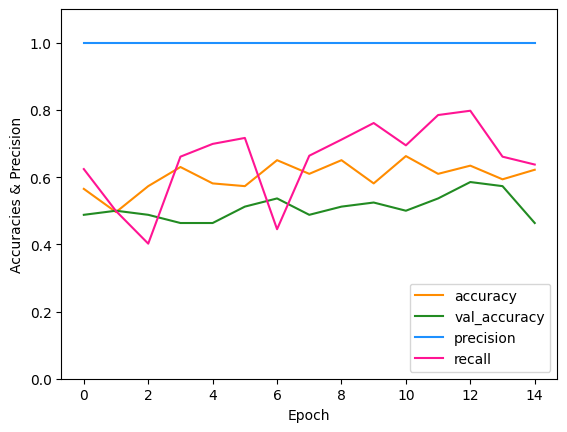

In [ ]:
plt.plot(history.history['sparse_categorical_accuracy'], label = 'accuracy', color = 'darkorange')
plt.plot(history.history['val_sparse_categorical_accuracy'], label = 'val_accuracy', color = 'forestgreen')
plt.plot(history.history['precision'], label = 'precision', color = 'dodgerblue')
plt.plot(history.history['recall'], label = 'recall', color = 'deeppink')
plt.xlabel('Epoch')
plt.ylabel('Accuracies & Precision')
plt.ylim([0, 1.1])
plt.legend(loc = 'lower right')

#also need to plot precision, recall, f1_score. Look them up, why do they matter?
#precision metric: uses true positives and false positives of predictions to calculate the precision of a prediction
#recall: uses true positives and false negatives to calculate the recall of a prediction
#f1_score: weighted average of the precision and recall of a prediction

In [ ]:
from keras.models import load_model
model.save('404Soybeans.h5')